##Training Car Detection Model for Image Forensics Project.
#### Car Detection is trained in Keras utilizing Tensorflow as back-end on jupyter notebook. It takes an image as an input and returns a binary decision whether a car is detected in the image or not. I am using both Convolutional Neural Network (CNN) and Dense Neural Network(DNN) to train the model.


**Step: 01** 
Mount Drive to access datasets from google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Step:02** 
*   Install unzip to unzip datasets on google drive.
*   Unzip datasets from google drive and its your choice whether to unzip on google colab or google drive destinantion.







In [ ]:
!apt install unzip
!unzip  '/content/drive/My Drive/CarDetectionImages/TrainImages.zip' -d '/content/drive/My Drive/Car_data/TrainData/'
!unzip  '/content/drive/My Drive/CarDetectionImages/ResizeTrainImages.zip' -d '/content/drive/My Drive/Car_data/ResizeTrainData/'

**Step:04**  Using Convolutional Neural Network (CNN) to train the model on dataset.


```
# This is formatted as code
```



*   Import needed classes and there respective functions.
*   Initialize variable with respective paths to dataset folders.
*   Create a matrix to flatten all the values for further use.
*   Defining training parameters for car, building, roads, and random.
*   Definig conditions for test data to determine difference between pictures with car and without car.
*   Training Data Reshaping into numpy array.
*   Plot Car in MatLab using matplotlib.
*   Test Data Reshaping into numpy array.
*   Binary-class problem, output is 0 (CAR) and 1(NOT CAR). It might be a good practice to use "one hot encoding" to class values. 
*   Set up parameters this is a crucial step as accuracy of model depends on this with Batch size = 14 and epochs = 55 the model is trained with accuracy upto 89%.
*   Build model using CNN.
*   Define Loss & compile model with suitable loss type and optimizer. 
*   Fit the model
*   Test the Model and return the highest accuracy model.
*   Save the model with specified name for (CNN) trained model.











(100, 100, 1)
Car Train data : 880
Total Train Data : 1655
X_train shape
(1655, 100, 100, 1)
Y_train Shape
(1655, 1)


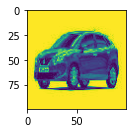

Total Test Data : 238
(1655, 1)
[0]
Train on 1489 samples, validate on 166 samples
Epoch 1/55
1489/1489 [==============================] - 24s 16ms/step - loss: 0.6772 - accuracy: 0.6051 - val_loss: 0.7432 - val_accuracy: 0.4699
Epoch 2/55
1489/1489 [==============================] - 23s 16ms/step - loss: 0.4582 - accuracy: 0.7938 - val_loss: 0.3944 - val_accuracy: 0.8855
Epoch 3/55
1489/1489 [==============================] - 24s 16ms/step - loss: 0.3370 - accuracy: 0.8704 - val_loss: 0.5768 - val_accuracy: 0.7410
Epoch 4/55
1489/1489 [==============================] - 24s 16ms/step - loss: 0.2435 - accuracy: 0.9013 - val_loss: 0.7655 - val_accuracy: 0.6988
Epoch 5/55
1489/1489 [==============================] - 25s 17ms/step - loss: 0.1681 - accuracy: 0.9402 - val_loss: 0.1443 - val_accuracy: 0.9639
Epoch 6/55
1489/1489 [==============================] - 26s 18ms/step - loss: 0.1122 - accuracy: 0.9664 - val_loss: 0.3808 - val_accuracy: 0.8916
Epoch 7/55
1489/1489 [===================

In [ ]:
# import classes and functions 

from keras.models import Sequential 
from keras.layers.core import Dense, Activation
from keras.layers import Convolution2D, MaxPooling2D,Dropout, Flatten
from keras.utils import np_utils
from PIL import Image
import os,sys
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from array import array
import numpy as np 
import matplotlib.pyplot as plot
np.random.seed(0)  #for reproducibility 

 
# Training & Testing Data
row,column = 100,100
testCarExamples,testNonCarExamples = 122,116 # Documentation purpose 
pathResizedTrainDataCar = '/content/drive/My Drive/Car_data/ResizeTrainData/ResizeTrainImages/car/'
pathResizedTrainDataBuilding = '/content/drive/My Drive/Car_data/ResizeTrainData/ResizeTrainImages/building/'
pathResizedTrainDataRoad = '/content/drive/My Drive/Car_data/ResizeTrainData/ResizeTrainImages/road/'
pathResizedTrainDataRandom = '/content/drive/My Drive/Car_data/ResizeTrainData/ResizeTrainImages/random/'
pathResizedTestData = '/content/drive/My Drive/Car_data/ResizeTrainData/ResizeTrainImages/validation/'

# create a matrix to flatten all the values

X_train = []
Y_train = []
X_test  = []
Y_test	= []
classes = 2 

# ............................ CAR ...................................

listingCar = os.listdir(pathResizedTrainDataCar)
for file in listingCar:
	if file != '.DS_Store' :
		img = Image.open(pathResizedTrainDataCar + file)
		x = img_to_array(img)
		X_train.append(x)
		Y_train.append(0) # CAR 
	


print(X_train[0].shape)
print("Car Train data : %d" %len(X_train))   

# ........................... Building ...............................

listingBuilding = os.listdir(pathResizedTrainDataBuilding)
for file in listingBuilding:
	if file != '.DS_Store' :
		img = Image.open(pathResizedTrainDataBuilding + file)
		x = img_to_array(img)
		X_train.append(x)
		Y_train.append(1) # NOT CAR (Building)
	
	

# ........................... Road ....................................

listingRoad = os.listdir(pathResizedTrainDataRoad)
for file in listingRoad:
	if file != '.DS_Store' :
		img = Image.open(pathResizedTrainDataRoad + file)
		x = img_to_array(img)
		X_train.append(x)
		Y_train.append(1) # NOT CAR (Road)
	


# .......................... Random .................................

listingRandom = os.listdir(pathResizedTrainDataRandom)
for file in listingRandom:
	if file != '.DS_Store' :
		img = Image.open(pathResizedTrainDataRandom + file)
		x = img_to_array(img)
		X_train.append(x)
		Y_train.append(1) # NOT CAR (Random)

# ........................... Test Data ...............................

listingTestData = os.listdir(pathResizedTestData)
for file in listingTestData:
	if file != '.DS_Store' :
		img = Image.open(pathResizedTestData + file)
		x = img_to_array(img)
		X_test.append(x)
		if file.startswith("test_car"):
			Y_test.append(0) # CAR
		else:
			Y_test.append(1) # NOT CAR 
	

# ......................... Train Data Reshaping .......................
total_input = len(X_train)
print("Total Train Data : %d" %total_input)

X_train = np.array(X_train)
X_train = X_train.reshape(total_input, row, column, 1) 
X_train = X_train.astype('float32')     
X_train /= 255 
Y_train = np.array(Y_train)   
Y_train = Y_train.reshape(total_input, 1)   

print("X_train shape")
print(X_train.shape)
print("Y_train Shape")
print(Y_train.shape)

# ................................. Plot Car in MatLab .....................

plot.subplot(221)
plot.imshow(X_train[0].reshape(row,column))
plot.show()

# ......................... Test Data Reshaping .......................

total_testData = len(X_test)
print("Total Test Data : %d" %total_testData)
X_test = np.array(X_test)
X_test = X_test.reshape(total_testData, row, column , 1) 
X_test = X_test.astype('float32')     
X_test /= 255 
Y_test = np.array(Y_test)
Y_test = Y_test.reshape(total_testData, 1)  


# It's a binary-class problem, output is 0 (CAR) and 1(NOT CAR). it's a good practice to use "one hot encoding" to class values 

print(Y_train.shape)
print(Y_train[0])

Y_train = np_utils.to_categorical(Y_train, classes) 
Y_test = np_utils.to_categorical(Y_test, classes)    
 
# Set up parameters
input_size = row * column
batch_size = 14   
hidden_neurons = 30    
epochs = 55
 

# Build the model
model = Sequential() 
model.add(Convolution2D(32, (2, 2), input_shape=(row, column, 1))) 
#32 convolutional filter with size (2,2)

model.add(Activation('relu'))
model.add(Convolution2D(32, (2, 2)))  
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # filter size (2,2)
model.add(Dropout(0.5)) 
#Drop out is used for avoiding data overfitting by reducing the NN branches.  
            
model.add(Flatten())
  
model.add(Dense(hidden_neurons)) 
model.add(Activation('relu'))      
model.add(Dense(classes)) 
model.add(Activation('softmax'))


# Define Loss & compile model 
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adadelta') 
# optimizer - "rmsprop"/"sgd"/"adadelta" , loss - "binary_crossentropy" / "categorical_crossentropy"

# fit the model 

model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split = 0.1, verbose=1)
 
# Test 
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1]) 

# save model 
model.save('car_detection_keras_CNN_model.h5')




**Step:05** Using Dense Neural Network (DNN) to train the model on dataset.
*   Import needed classes and there respective functions.
*   Initialize variable with respective paths to dataset folders.   
*   Create a matrix to flatten all the values for further use.
*   Defining training parameters for car, building, roads, and random.
*   Definig conditions for test data to determine difference between pictures with car and without car.
*   Training Data Reshaping into numpy array.
*   Plot Car in MatLab using matplotlib.
*   Test Data Reshaping into numpy array.
*   Binary-class problem, output is 0 (CAR) and 1(NOT CAR). It might be a good practice to use "one hot encoding" to class values. 
*   Set up parameters this is a crucial step as accuracy of model depends on this with Batch size = 10 and epochs = 50 the model is trained with accuracy upto 87.8%.
*   Build model using DNN.
*   Define Loss & compile model with suitable loss type and optimizer.
*   Fit the model.
*   Test the Model and return the highest accuracy model.
*   Save the model with specified name for (DNN) trained model.   

(100, 100, 1)
Car Train data : 880
Total Train Data : 1655
X_train shape
(1655, 10000)
Y_train Shape
(1655, 1)


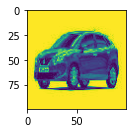

Total Test Data : 238
(1655, 1)
[0]
Epoch 1/50
1655/1655 [==============================] - 2s 976us/step - loss: 2.1681 - accuracy: 0.5927
Epoch 2/50
1655/1655 [==============================] - 2s 951us/step - loss: 0.9763 - accuracy: 0.6429
Epoch 3/50
1655/1655 [==============================] - 2s 962us/step - loss: 0.7146 - accuracy: 0.6653
Epoch 4/50
1655/1655 [==============================] - 2s 1ms/step - loss: 0.6014 - accuracy: 0.6949
Epoch 5/50
1655/1655 [==============================] - 2s 957us/step - loss: 0.5639 - accuracy: 0.7347
Epoch 6/50
1655/1655 [==============================] - 2s 934us/step - loss: 0.5548 - accuracy: 0.7281
Epoch 7/50
1655/1655 [==============================] - 2s 980us/step - loss: 0.5162 - accuracy: 0.7535
Epoch 8/50
1655/1655 [==============================] - 2s 974us/step - loss: 0.5150 - accuracy: 0.7559
Epoch 9/50
1655/1655 [==============================] - 2s 966us/step - loss: 0.4931 - accuracy: 0.7595
Epoch 10/50
1655/1655 [=======

In [ ]:
# import classes and functions 
from keras.models import Sequential 
from keras.layers.core import Dense, Activation
from keras.layers import Dropout, Flatten 
from keras.utils import np_utils
from PIL import Image
import os,sys
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from array import array
import numpy as np 
import matplotlib.pyplot as plot
np.random.seed(0)  #for reproducibility 

 
# Training & Testing Data
row,column = 100,100
testCarExamples,testNonCarExamples = 122,116 # Documentation purpose 
pathResizedTrainDataCar = '/content/drive/My Drive/Car_data/ResizeTrainData/ResizeTrainImages/car/'
pathResizedTrainDataBuilding = '/content/drive/My Drive/Car_data/ResizeTrainData/ResizeTrainImages/building/'
pathResizedTrainDataRoad = '/content/drive/My Drive/Car_data/ResizeTrainData/ResizeTrainImages/road/'
pathResizedTrainDataRandom = '/content/drive/My Drive/Car_data/ResizeTrainData/ResizeTrainImages/random/'
pathResizedTestData = '/content/drive/My Drive/Car_data/ResizeTrainData/ResizeTrainImages/validation/'

# create a matrix to flatten all the values

X_train = []
Y_train = []
X_test  = []
Y_test	= []
classes = 2 

# ............................ CAR ...................................

listingCar = os.listdir(pathResizedTrainDataCar)
for file in listingCar:
	if file != '.DS_Store' :
		img = Image.open(pathResizedTrainDataCar + file)
		x = img_to_array(img)
		X_train.append(x)
		Y_train.append(0) # CAR 
	


print(X_train[0].shape)
print("Car Train data : %d" %len(X_train))   

# ........................... Building ...............................

listingBuilding = os.listdir(pathResizedTrainDataBuilding)
for file in listingBuilding:
	if file != '.DS_Store' :
		img = Image.open(pathResizedTrainDataBuilding + file)
		x = img_to_array(img)
		X_train.append(x)
		Y_train.append(1) # NOT CAR (Building)
	
	

# ........................... Road ....................................

listingRoad = os.listdir(pathResizedTrainDataRoad)
for file in listingRoad:
	if file != '.DS_Store' :
		img = Image.open(pathResizedTrainDataRoad + file)
		x = img_to_array(img)
		X_train.append(x)
		Y_train.append(1) # NOT CAR (Road)
	

# .......................... Random .................................

listingRandom = os.listdir(pathResizedTrainDataRandom)
for file in listingRandom:
	if file != '.DS_Store' :
		img = Image.open(pathResizedTrainDataRandom + file)
		x = img_to_array(img)
		X_train.append(x)
		Y_train.append(1) # NOT CAR (Random)


# ........................... Test Data ...............................

listingTestData = os.listdir(pathResizedTestData)
for file in listingTestData:
	if file != '.DS_Store' :
		img = Image.open(pathResizedTestData + file)
		x = img_to_array(img)
		X_test.append(x)
		if file.startswith("test_car"):
			Y_test.append(0) # CAR
		else:
			Y_test.append(1) # NOT CAR 
	

# ......................... Train Data Reshaping .......................
total_input = len(X_train)
print("Total Train Data : %d" %total_input)

X_train = np.array(X_train)
X_train = X_train.reshape(total_input, row*column) 
X_train = X_train.astype('float32')     
X_train /= 255 
Y_train = np.array(Y_train)   
Y_train = Y_train.reshape(total_input, 1)   

print("X_train shape")
print(X_train.shape)
print("Y_train Shape")
print(Y_train.shape)

# ................................. Plot Car in MatLab .....................

plot.subplot(221)
plot.imshow(X_train[0].reshape(row,column))
plot.show()

# ......................... Test Data Reshaping .......................

total_testData = len(X_test)
print("Total Test Data : %d" %total_testData)
X_test = np.array(X_test)
X_test = X_test.reshape(total_testData, row*column) 
X_test = X_test.astype('float32')     
X_test /= 255 
Y_test = np.array(Y_test)
Y_test = Y_test.reshape(total_testData, 1)  


# It's a binary-class problem, output is 0 (CAR) and 1 (NOT CAR). it's a good practice to use "one hot encoding" to class values 

print(Y_train.shape)
print(Y_train[0])

Y_train = np_utils.to_categorical(Y_train, classes) 
Y_test = np_utils.to_categorical(Y_test, classes)    
 
# Set up parameters
input_size = row * column
batch_size = 10 
hidden_neurons = 100
epochs = 50
 
# Build the model
model = Sequential()     
model.add(Dense(hidden_neurons, input_dim=input_size)) 
model.add(Activation('relu'))  
#model.add(Dropout(0.2))   
model.add(Dense(classes, input_dim=hidden_neurons)) 
model.add(Activation('softmax'))

# Define Loss & compile model 
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='rmsprop') 
# optimizer - "rmsprop" / "sgd"/"adadelta" , loss - "binary_crossentropy" / "categorical_crossentropy"

# fit the model 
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)
 
# Test 
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1]) 

# save model 
model.save('car_detection_keras_DNN_model.h5')



**Step:06** Now test any image with the traines models, The default model is CNN you can also cahnge it.
1.   Give paths to your trained models
2.   Give path to your image.



[[9.0163415e-09 1.0000000e+00]]

.......... Not A Car .......



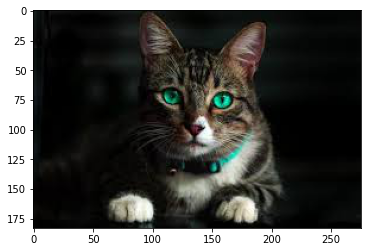

In [ ]:
from keras.models import load_model
import numpy as np 
import os,sys
from PIL import Image
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plot
from optparse import OptionParser

mode = "CNN"
model = None

if mode == "DNN":
    model = load_model('/content/drive/My Drive/CarDetectionModels/car_detection_keras_DNN_model.h5')
else:
    model = load_model('/content/drive/My Drive/CarDetectionModels/car_detection_keras_CNN_model.h5')

row,column = 100,100


# take input to test it 
parser = OptionParser()
parser.add_option("-f", "--file", dest="filename", help="write report to FILE", metavar="FILE")
pathimg = "/content/sample_data/billi2.jpg"

img = Image.open("/content/sample_data/billi2.jpg")
img1 = image.load_img("/content/sample_data/billi2.jpg", target_size=(224,224))
img1 = np.asarray(img)
plot.imshow(img1)
img1 = np.expand_dims(img1, axis=0)
#print("TESTING IMAGE -----> %s %s %s" %( img.bits, img.size, img.format))

# Resize the image
img = img.resize((row,column),Image.ANTIALIAS)

# Gray Scale Image 

def grayscale(picture):
    res= Image.new(picture.mode, picture.size)
    width, height = picture.size

    for i in range(0, width):
        for j in range(0, height):
            pixel=picture.getpixel((i,j))
            avg=(pixel[0]+pixel[1]+pixel[2])/3
            res.putpixel((i,j),(int(avg),int(avg),int(avg)))
    res.show()
    return res

gray_image = grayscale(img)


# Normalize between 0 and 1 
def normalize(picture):
	width, height = picture.size
	normalized_array = []
	for j in range(0, height):
		for i in range(0, width):
			pixel = picture.getpixel((i,j))
			normalized_array.append( pixel[0] / 255.0 )
	return np.array(normalized_array)


X_test = normalize(gray_image)

if mode == "DNN":
    X_test = X_test.reshape(1, row*column) # [row*column] - 1D input for DNN
else:
    X_test = X_test.reshape(1, row, column, 1)  # (1, row, column) 3D input for CNN 


# Do predictions 

classes = model.predict(X_test)
print(classes)

maxVal = classes[0].max()
indexVal = np.where(classes[0]==maxVal) # result is an array


if (indexVal[0] == 0):
    print("\n......... It's CAR .........\n")
else: 
    print("\n.......... Not A Car .......\n")







